# Swiftide evaluation with Ragas

This notebook demonstrates how to evaluate a Swiftide query pipeline with Ragas. The rust implementation is a bit contrived to make it more configurable. However, the main thing is running the query pipeline with an evaluator, and then exporting the result of that evaluator to a JSON file compatible with a HF dataset.

In the Rust code we use all features enabled as the base line, capturing the answers as the 'ground truth'.

**tl&dr; pretty charts at the bottom**

In [11]:
# Questions have already been prepared for convenience. Load it from a file so we can use them as input for the next steps
import json
import shlex

with open('questions.json', 'r') as file:
    data = json.load(file)

questions_formatted = " ".join(shlex.quote(question) for question in data['questions'])
questions_formatted

'\'What is the primary purpose of the Swiftide project?  \' \'How does Swiftide enhance Retrieval Augmented Generation (RAG) applications?  \' \'Which programming language is Swiftide written in?  \' \'What are the key components of the indexing pipeline in Swiftide?  \' \'How does Swiftide achieve fast data indexing?  \' \'Can users extend the functionality of Swiftide?  \' \'What types of data can Swiftide index?  \' \'How does metadata quality assurance (QA) work in Swiftide?  \' \'Which external platforms does Swiftide integrate with?  \' \'What is the role of asynchronous processing in Swiftide?  \' \'What features make Swiftide easy to use?  \' \'What is the significance of the chunking process in data indexing?  \' \'Can users create custom transformers in Swiftide?  \' \'What is the function of the `FileLoader` in Swiftide\'"\'"\'s indexing process?  \' \'How is data transformation handled in Swiftide?  \' \'What are the benefits of using Rust for the Swiftide library?  \' \'Ho

In [15]:
# Run with all features and use the answers as the ground truths
!RUST_LOG=swiftide=info cargo run -- --language rust --path ../../swiftide --output base.json --record-ground-truth {questions_formatted}

  --> src/main.rs:12:29
   |
12 |         search_strategies::{HybridSearch, SimilaritySingleEmbedding},
   |                             ^^^^^^^^^^^^
   |
   = note: `#[warn(unused_imports)]` on by default

  --> src/main.rs:22:52
   |
22 |     integrations::{openai::OpenAI, qdrant::Qdrant, redis::Redis, treesit...
   |                                                    ^^^^^^^^^^^^

    Finished `dev` profile [unoptimized + debuginfo] target(s) in 0.10s
     Running `target/debug/ragas --language rust --path ../../swiftide --output base.json --record-ground-truth 'What is the primary purpose of the Swiftide project?  ' 'How does Swiftide enhance Retrieval Augmented Generation (RAG) applications?  ' 'Which programming language is Swiftide written in?  ' 'What are the key components of the indexing pipeline in Swiftide?  ' 'How does Swiftide achieve fast data indexing?  ' 'Can users extend the functionality of Swiftide?  ' 'What types of data can Swiftide index?  ' 'How does metadata qu

In [16]:
# Run with chunking enabled and QA metadata disabled
!RUST_BACKTRACE=1 cargo run --no-default-features --features=chunk -- --language rust --path ../../swiftide --output metadata.json --record-ground-truth --file base.json

  --> src/main.rs:12:29
   |
12 |         search_strategies::{HybridSearch, SimilaritySingleEmbedding},
   |                             ^^^^^^^^^^^^
   |
   = note: `#[warn(unused_imports)]` on by default

  --> src/main.rs:22:52
   |
22 |     integrations::{openai::OpenAI, qdrant::Qdrant, redis::Redis, treesit...
   |                                                    ^^^^^^^^^^^^

    Finished `dev` profile [unoptimized + debuginfo] target(s) in 0.10s
     Running `target/debug/ragas --language rust --path ../../swiftide --output metadata.json --record-ground-truth --file base.json`
2024-09-15T14:35:57.537059Z  INFO ragas: Indexing code path="../../swiftide" language="rust"
2024-09-15T14:35:57.554952Z  INFO indexing_pipeline.run: swiftide_indexing::pipeline: Starting indexing pipeline with 14 concurrency
2024-09-15T14:35:57.555028Z  INFO indexing_pipeline.run:setup: swiftide_integrations::qdrant: Checking if collection swiftide-ragas exists
2024-09-15T14:35:57.556127Z  WARN indexing

In [21]:
# Run with chunking disabled 
!cargo run --no-default-features --features=metadata -- --language rust --path ../../swiftide --output chunk.json --record-ground-truth --file base.json

   Compiling ragas v0.1.0 (/Users/timonv/projects/swiftide-tutorial/ragas)
  --> src/main.rs:12:29
   |
12 |         search_strategies::{HybridSearch, SimilaritySingleEmbedding},
   |                             ^^^^^^^^^^^^
   |
   = note: `#[warn(unused_imports)]` on by default

  --> src/main.rs:22:52
   |
22 |     integrations::{openai::OpenAI, qdrant::Qdrant, redis::Redis, treesit...
   |                                                    ^^^^^^^^^^^^

    Finished `dev` profile [unoptimized + debuginfo] target(s) in 2.35s
     Running `target/debug/ragas --language rust --path ../../swiftide --output chunk.json --record-ground-truth --file base.json`
2024-09-15T14:55:26.215658Z  INFO ragas: Indexing code path="../../swiftide" language="rust"
2024-09-15T14:55:26.235306Z  INFO indexing_pipeline.run: swiftide_indexing::pipeline: Starting indexing pipeline with 14 concurrency
2024-09-15T14:55:26.235384Z  INFO indexing_pipeline.run:setup: swiftide_integrations::qdrant: Checking if col

In [22]:
# Run with chunking and metadata disabled
!cargo run --no-default-features -- --language rust --path ../../swiftide --output nothing.json --record-ground-truth --file base.json

   Compiling ragas v0.1.0 (/Users/timonv/projects/swiftide-tutorial/ragas)
  --> src/main.rs:12:29
   |
12 |         search_strategies::{HybridSearch, SimilaritySingleEmbedding},
   |                             ^^^^^^^^^^^^
   |
   = note: `#[warn(unused_imports)]` on by default

  --> src/main.rs:22:52
   |
22 |     integrations::{openai::OpenAI, qdrant::Qdrant, redis::Redis, treesit...
   |                                                    ^^^^^^^^^^^^

    Finished `dev` profile [unoptimized + debuginfo] target(s) in 1.10s
     Running `target/debug/ragas --language rust --path ../../swiftide --output nothing.json --record-ground-truth --file base.json`
2024-09-15T14:58:40.727711Z  INFO ragas: Indexing code path="../../swiftide" language="rust"
2024-09-15T14:58:40.748653Z  INFO indexing_pipeline.run: swiftide_indexing::pipeline: Starting indexing pipeline with 14 concurrency
2024-09-15T14:58:40.748730Z  INFO indexing_pipeline.run:setup: swiftide_integrations::qdrant: Checking if c

In [23]:
from datasets import load_dataset
files = { 
    "everything": "base.json",
    "metadata": "metadata.json",
    "chunk": "chunk.json",
    "nothing": "nothing.json"
}
dataset = load_dataset("json", data_files=files)

dataset

Generating everything split: 0 examples [00:00, ? examples/s]

Generating metadata split: 0 examples [00:00, ? examples/s]

Generating chunk split: 0 examples [00:00, ? examples/s]

Generating nothing split: 0 examples [00:00, ? examples/s]

DatasetDict({
    everything: Dataset({
        features: ['answer', 'contexts', 'ground_truth', 'question'],
        num_rows: 97
    })
    metadata: Dataset({
        features: ['answer', 'contexts', 'ground_truth', 'question'],
        num_rows: 97
    })
    chunk: Dataset({
        features: ['answer', 'contexts', 'ground_truth', 'question'],
        num_rows: 97
    })
    nothing: Dataset({
        features: ['answer', 'contexts', 'ground_truth', 'question'],
        num_rows: 97
    })
})

In [24]:
from ragas.metrics import (
    answer_relevancy,
    faithfulness,
    context_recall,
    context_precision,
)

import pandas as pd

from ragas import evaluate

# Run evaluate on each dataset, add a column with the dataset name, then concat into single dataframe
all_results = []
for key in files:
    result = evaluate(dataset[key], metrics=[answer_relevancy,faithfulness,context_recall,context_precision]).to_pandas()
    result['dataset'] = key
    all_results.append(result)
    
df = pd.concat(all_results)
df



/Users/timonv/Library/Caches/pypoetry/virtualenvs/swiftide-ragas-example-cam5qANt-py3.12/lib/python3.12/site-packages/pysbd/segmenter.py:66: SyntaxWarning: invalid escape sequence '\s'
  for match in re.finditer('{0}\s*'.format(re.escape(sent)), self.original_text):
/Users/timonv/Library/Caches/pypoetry/virtualenvs/swiftide-ragas-example-cam5qANt-py3.12/lib/python3.12/site-packages/pysbd/lang/arabic.py:29: SyntaxWarning: invalid escape sequence '\.'
  txt = re.sub('(?<={0})\.'.format(am), '∯', txt)
/Users/timonv/Library/Caches/pypoetry/virtualenvs/swiftide-ragas-example-cam5qANt-py3.12/lib/python3.12/site-packages/pysbd/lang/persian.py:29: SyntaxWarning: invalid escape sequence '\.'
  txt = re.sub('(?<={0})\.'.format(am), '∯', txt)


Evaluating:   0%|          | 0/388 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/388 [00:00<?, ?it/s]

No statements were generated from the answer.


Evaluating:   0%|          | 0/388 [00:00<?, ?it/s]

No statements were generated from the answer.


Evaluating:   0%|          | 0/388 [00:00<?, ?it/s]

No statements were generated from the answer.


,answer,contexts,ground_truth,question,answer_relevancy,faithfulness,context_recall,context_precision,dataset
0,## Challenges Swiftide Aims to Address Compare...,"[""Swiftide is a Rust native library for buildi...",## Challenges Swiftide Aims to Address Compare...,What challenges does Swiftide aim to address c...,0.988433,0.875000,1.000000,1.000000,everything
1,```markdown\nData ingestion and transformation...,"[""Swiftide is a Rust native library for buildi...",```markdown\nData ingestion and transformation...,How are data ingestion and transformation mana...,0.968458,1.000000,0.846154,0.986111,everything
2,## Implications of Swiftide Being Under Heavy ...,"[""Swiftide is a Rust native library for buildi...",## Implications of Swiftide Being Under Heavy ...,What are the implications of Swiftide being un...,0.993777,1.000000,1.000000,0.611111,everything
3,"Based on the provided context, the components ...","[""\n\n let answer = query_pipeline\n ...","Based on the provided context, the components ...",What components are involved in building a dat...,0.983170,1.000000,1.000000,0.968254,everything
4,```markdown\nTo customize the persistence of n...,"[""use anyhow::{Context as _, Result};\nuse asy...",```markdown\nTo customize the persistence of n...,How do you customize the persistence of node v...,0.957534,0.875000,1.000000,0.586111,everything
...,...,...,...,...,...,...,...,...,...
92,```markdown\nA developer would prefer to use R...,"[""//! This module provides the integration wit...",```markdown\nA developer would prefer to use R...,In what scenarios would a developer prefer to ...,0.986551,0.619048,0.625000,1.000000,nothing
93,```markdown\nDevelopers can optimize their ind...,"[""use anyhow::Result;\nuse futures_util::{Stre...",```markdown\nDevelopers can optimize their ind...,How can developers optimize their indexing pip...,0.972976,0.500000,1.000000,0.672222,nothing
94,```markdown\nThe provided context does not inc...,"[""//! This module provides the integration wit...",```markdown\nThe provided context does not inc...,How does Swiftide support collaboration among ...,0.000000,1.000000,1.000000,0.000000,nothing
95,```markdown\nSwiftide supports the following t...,"[""//! The `loaders` module provides functional...",```markdown\nSwiftide supports the following t...,What are the different types of loaders suppor...,0.964834,0.727273,1.000000,0.533333,nothing


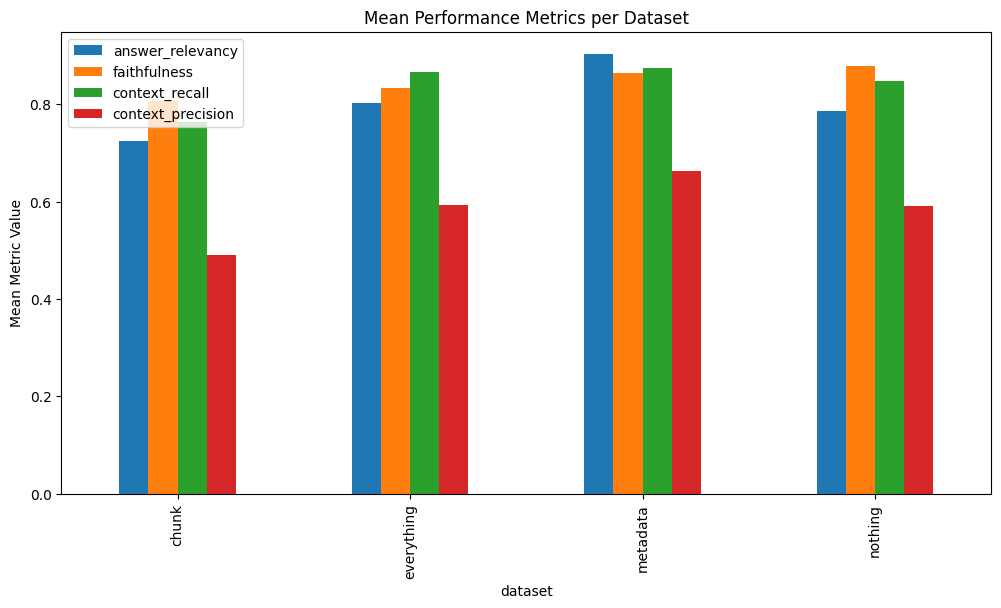

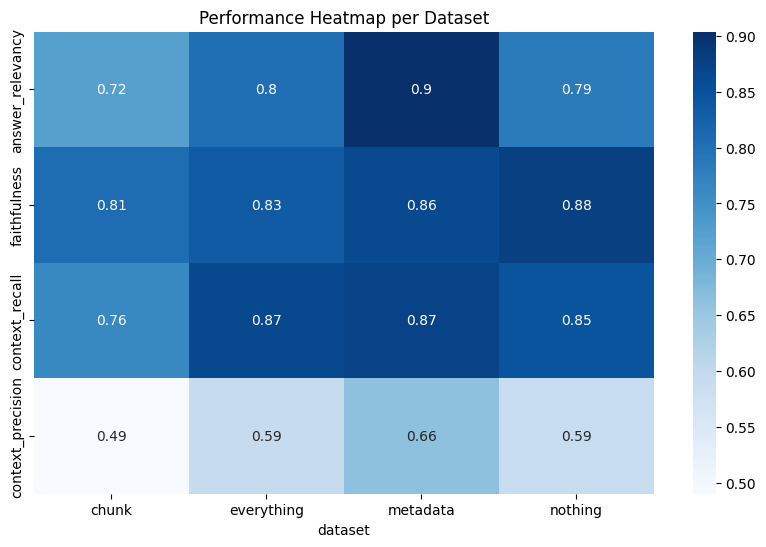

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping by dataset and calculating the mean
df_grouped = df.groupby('dataset').mean(True).reset_index()

# 1. Bar Chart
df_grouped.plot(x='dataset', kind='bar', figsize=(12, 6), title='Mean Performance Metrics per Dataset')
plt.ylabel('Mean Metric Value')
plt.show()

# 2. Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_grouped.set_index('dataset').T, annot=True, cmap='Blues')
plt.title('Performance Heatmap per Dataset')
plt.show()
